In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df_training = pd.read_csv("../data_mod/train_motion_data.csv")
df_test = pd.read_csv("../data_mod/test_motion_data.csv")

df_training

,AccX,AccY,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,NORMAL,0.000000,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,NORMAL,-1.624864,-1.082492,-0.812432,-0.541246
2,-0.594660,-0.122410,NORMAL,1.030204,0.960082,-0.297330,-0.061205
3,0.738478,-0.228456,NORMAL,1.333138,-0.106046,0.369239,-0.114228
4,0.101741,0.777568,NORMAL,-0.636737,1.006023,0.050871,0.388784
...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,SLOW,2.374675,-1.824629,0.457844,-1.008745
3640,-1.934203,0.914925,SLOW,-2.849891,2.932414,-0.967102,0.457462
3641,-0.222845,0.747304,SLOW,1.711359,-0.167621,-0.111422,0.373652
3642,-0.349423,0.067261,SLOW,-0.126579,-0.680043,-0.174712,0.033630


In [37]:
df_training.isna().sum()

AccX        0
AccY        0
Class       0
DiffAccX    0
DiffAccY    0
VelX        0
VelY        0
dtype: int64

## Change categories to numbers

In [38]:
df_training = df_training.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_test = df_test.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training

,AccX,AccY,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,0,-1.624864,-1.082492,-0.812432,-0.541246
2,-0.594660,-0.122410,0,1.030204,0.960082,-0.297330,-0.061205
3,0.738478,-0.228456,0,1.333138,-0.106046,0.369239,-0.114228
4,0.101741,0.777568,0,-0.636737,1.006023,0.050871,0.388784
...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,2,2.374675,-1.824629,0.457844,-1.008745
3640,-1.934203,0.914925,2,-2.849891,2.932414,-0.967102,0.457462
3641,-0.222845,0.747304,2,1.711359,-0.167621,-0.111422,0.373652
3642,-0.349423,0.067261,2,-0.126579,-0.680043,-0.174712,0.033630


## Normalize the data

In [39]:
X_training = df_training.drop(columns=["Class"])
X_training = (X_training - X_training.mean()) / X_training.std() * 100

X_training["Class"] = df_training["Class"]
X_training

,AccX,AccY,DiffAccX,DiffAccY,VelX,VelY,Class
0,-4.105593,8.126800,0.010300,-0.010421,-4.105593,8.126800,0
1,-168.957027,-111.696347,-151.542377,-101.201825,-168.957027,-111.696347,0
2,-64.437130,-5.422989,96.098456,89.738101,-64.437130,-5.422989,0
3,70.817107,-17.161393,124.353421,-9.923577,70.817107,-17.161393,0
4,6.216602,94.197287,-59.378806,94.032688,6.216602,94.197287,0
...,...,...,...,...,...,...,...
3639,88.795978,-215.193071,221.498566,-170.576840,88.795978,-215.193071,2
3640,-200.341232,109.401604,-265.801873,274.111831,-200.341232,109.401604,2
3641,-26.714411,90.847295,159.630443,-15.679652,-26.714411,90.847295,2
3642,-39.556507,15.572024,-11.795809,-63.580862,-39.556507,15.572024,2


In [40]:
X_testing = df_test.drop(columns="Class")
X_testing = (X_testing - X_testing.mean()) / X_testing.std() * 100

X_testing["Class"] = df_test["Class"]
X_testing

,AccX,AccY,DiffAccX,DiffAccY,VelX,VelY,Class
0,67.345100,-9.509000,-0.021340,-0.012385,-10.948927,14.564454,1
1,57.982946,10.303100,-8.494392,16.758078,58.012497,10.295271,1
2,270.452050,-824.010358,192.270076,-706.238535,270.496822,-824.016540,1
3,229.805029,-828.171460,-36.808209,-3.534656,229.846889,-828.177633,1
4,283.133326,-732.402479,48.242495,81.053740,283.179007,-732.408842,1
...,...,...,...,...,...,...,...
3079,-84.712435,-57.627689,-73.609489,-1.097380,-84.693107,-57.635384,2
3080,145.444037,51.068429,208.277716,91.996249,145.479853,51.060520,2
3081,121.268079,-177.287100,-21.901364,-193.309813,121.302164,-177.294558,2
3082,83.265000,79.069807,-34.415357,216.987532,83.296362,79.061842,2


In [41]:
X_train = X_training.drop(columns="Class")
y_train = X_training.Class

X_test = X_testing.drop(columns="Class")
y_test = X_testing.Class

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

param_grid = {'n_estimators': np.arange(30, 80), 'learning_rate': np.linspace(0.01, 0.2, 15), 'max_depth': np.arange(1, 10)}

xgb_gscv = RandomizedSearchCV(xgb, param_grid, n_iter=20, cv=5, verbose=10, n_jobs=10, random_state=0)
xgb_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START learning_rate=0.09142857142857143, max_depth=1, n_estimators=62
[CV 2/5; 1/20] START learning_rate=0.09142857142857143, max_depth=1, n_estimators=62
[CV 3/5; 1/20] START learning_rate=0.09142857142857143, max_depth=1, n_estimators=62
[CV 4/5; 1/20] START learning_rate=0.09142857142857143, max_depth=1, n_estimators=62
[CV 5/5; 1/20] START learning_rate=0.09142857142857143, max_depth=1, n_estimators=62
[CV 1/5; 2/20] START learning_rate=0.07785714285714285, max_depth=8, n_estimators=37
[CV 2/5; 2/20] START learning_rate=0.07785714285714285, max_depth=8, n_estimators=37
[CV 3/5; 2/20] START learning_rate=0.07785714285714285, max_depth=8, n_estimators=37
[CV 4/5; 2/20] START learning_rate=0.07785714285714285, max_depth=8, n_estimators=37
[CV 5/5; 2/20] START learning_rate=0.07785714285714285, max_depth=8, n_estimators=37
[CV 4/5; 1/20] END learning_rate=0.09142857142857143, max_depth=1, n_estimators=62;, sco

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                        max_depth=1,
                                                        random_state=0),
                   n_iter=20, n_jobs=10,
                   param_distributions={'learning_rate': array([0.01      , 0.02357143, 0.03714286, 0.05071429, 0.06428571,
       0.07785714, 0.09142857, 0.105     , 0.11857143, 0.13214286,
       0.14571429, 0.15928571, 0.17285714, 0.18642857, 0.2       ]),
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])},
                   random_state=0, verbose=10)

In [44]:
best_params = xgb_gscv.best_params_
best_params

{'n_estimators': 54, 'max_depth': 2, 'learning_rate': 0.18642857142857144}

In [45]:
xgb_gscv.best_score_

0.43030155715340906

### Check for overfitting

In [46]:
xgb_gscv.score(X_train, y_train)

0.524423710208562

In [47]:
xgb_gscv.score(X_test, y_test)

0.45201037613488976

In [48]:
classes = ["NORMAL", "AGGRESSIVE", "SLOW"]

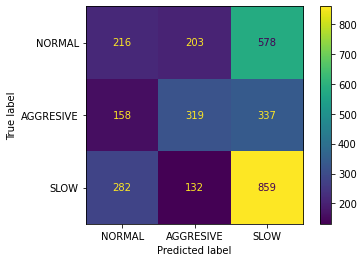

In [49]:
y_pred = xgb_gscv.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

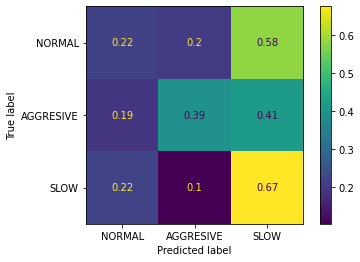

In [50]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()

In [51]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

base_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = xgb_gscv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(f'Improvement of {100 * (random_accuracy - base_accuracy) / base_accuracy:.3f}%.')

Model Performance
Accuracy = 0.432%.
Model Performance
Accuracy = 0.452%.
Improvement of 4.576%.
